# 1. Blobs Multi-Class Classification Problem

We will use a small multi-class classification problem as the basis to demonstrate transfer learning.the make_blobs() function that can be used to create a multi-class classification problem with the prescribed number of samples,input variables, classes, and variance of samples within a class

In [1]:
from sklearn.datasets.samples_generator import make_blobs
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=1)
#The “random_state” argument can be varied to give different versions of the problem (different cluster centers). 

ModuleNotFoundError: No module named 'tensorflow'

Specifically, we will refer to random_state=1 as Problem 1 and random_state=2 as Problem 2.

    Problem 1. Blobs problem with two input variables and three classes with the random_state argument set to one.
    Problem 2. Blobs problem with two input variables and three classes with the random_state argument set to two.
The complete example is listed below.

## 1.1 Visualize the samples

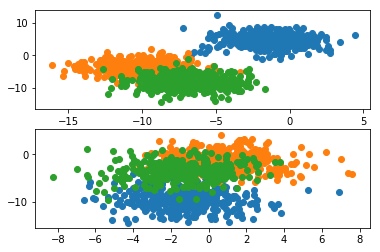

In [15]:
# plot of blobs multiclass classification problems 1 and 2
# Running the example generates a sample of 1,000 examples for Problem 1 and Problem 2 and creates a scatter 
# plot for each sample, coloring the data points by their class value.


from sklearn.datasets.samples_generator import make_blobs
from numpy import where
from matplotlib import pyplot

# generate samples for blobs problem with a given random seed
def samples_for_seed(seed):
	# generate samples
	X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=seed)
	return X, y

# create a scatter plot of points colored by class value
def plot_samples(X, y, classes=3):
	# plot points for each class
	for i in range(classes):
		# select indices of points with each class label
		samples_ix = where(y == i)
		# plot points for this class with a given color
		pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1])

# generate multiple problems
n_problems = 2
for i in range(1, n_problems+1):
	# specify subplot
	pyplot.subplot(210 + i)
	# generate samples
	X, y = samples_for_seed(i)
	# scatter plot of samples
	plot_samples(X, y)
# plot figure
pyplot.show()

This provides a good basis for transfer learning as each version of the problem has similar input data with a similar scale, although with different target information (e.g. cluster centers).

We would expect that aspects of a model fit on one version of the blobs problem (e.g. Problem 1) to be useful when fitting a model on a new version of the blobs problem (e.g. Problem 2).

## 1.2 Multilayer Perceptron Model for Problem 1
In this section, we will develop a Multilayer Perceptron model (MLP) or full connectivity NN for Problem 1 and save the model to file so that we can reuse the weights later.

The prepared samples can then be split in half, with 500 examples for both the train and test datasets.

### 1.2.1 Generate data

In [22]:
from keras.utils import np_utils
# prepare a blobs examples with a given random seed
def samples_for_seed(seed):
    # generate samples
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=seed)

    # one hot encode output variable
    ## the target variable must be one hot encoded so that 
    ## we can develop a model that predicts the probability of a given sample 
    ## belonging to each of the target classes.
    y = tf.keras.utils.to_categorical(y)
    
    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy

In [23]:
# prepare data
trainX, trainy, testX, testy = samples_for_seed(1)

### 1.2.2  Define and fit a full connectivity model on the training dataset.

In [32]:
# define and fit model on a training dataset
def fit_model(trainX, trainy, testX, testy):

    # define model
	model = Sequential()
	model.add(Dense(5, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(3, activation='softmax'))
	# compile model
	model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
	# fit model
	history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
	return model, history

In [33]:
# fit model on train dataset
model, history = fit_model(trainX, trainy, testX, testy)

### 1.2.3 Test process 

In [34]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.648, Test: 0.656


### 1.2.4 Visualize results

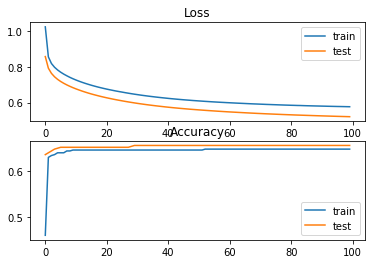

In [35]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

The summarize_model() function below implements this, taking the fit model, training history, and dataset as arguments and printing the model performance and creating a plot of model learning curves.

In [36]:
# summarize the performance of the fit model
def summarize_model(model, history, trainX, trainy, testX, testy):
	# evaluate the model
	_, train_acc = model.evaluate(trainX, trainy, verbose=0)
	_, test_acc = model.evaluate(testX, testy, verbose=0)
	print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
	# plot loss during training
	pyplot.subplot(211)
	pyplot.title('Loss')
	pyplot.plot(history.history['loss'], label='train')
	pyplot.plot(history.history['val_loss'], label='test')
	pyplot.legend()
	# plot accuracy during training
	pyplot.subplot(212)
	pyplot.title('Accuracy')
	pyplot.plot(history.history['acc'], label='train')
	pyplot.plot(history.history['val_acc'], label='test')
	pyplot.legend()
	pyplot.show()

Train: 0.648, Test: 0.656


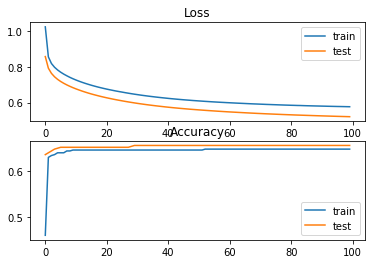

In [37]:
# evaluate model behavior
summarize_model(model, history, trainX, trainy, testX, testy)

### 1.2.5  save model to file


In [38]:
model.save('model.h5')

## 1.3 Exercise 1: Standalone MLP Model for Problem 2

In [39]:
# prepare data
###########################
##   insert code here   ###
###########################

Train: 0.794, Test: 0.828


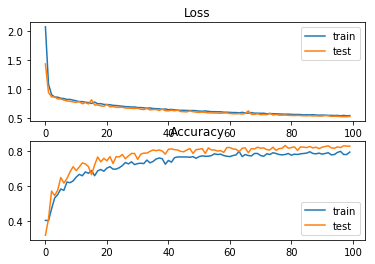

In [40]:
# fit mlp model on problem 2 and save model to file
from sklearn.datasets.samples_generator import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot

# prepare a blobs examples with a given random seed
def samples_for_seed(seed):
	# generate samples
	###########################
    ##   insert code here   ###
    ###########################
	# one hot encode output variable
	y = to_categorical(y)
	# split into train and test
	n_train = 500
	trainX, testX = X[:n_train, :], X[n_train:, :]
	trainy, testy = y[:n_train], y[n_train:]
	return trainX, trainy, testX, testy

# define and fit model on a training dataset
def fit_model(trainX, trainy, testX, testy):
	# define model
	model = Sequential()
	model.add(Dense(5, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(3, activation='softmax'))
	# compile model
	model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
	# fit model
	history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
	return model, history

# summarize the performance of the fit model
def summarize_model(model, history, trainX, trainy, testX, testy):
	# evaluate the model
	_, train_acc = model.evaluate(trainX, trainy, verbose=0)
	_, test_acc = model.evaluate(testX, testy, verbose=0)
	print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
	# plot loss during training
	pyplot.subplot(211)
	pyplot.title('Loss')
	pyplot.plot(history.history['loss'], label='train')
	pyplot.plot(history.history['val_loss'], label='test')
	pyplot.legend()
	# plot accuracy during training
	pyplot.subplot(212)
	pyplot.title('Accuracy')
	pyplot.plot(history.history['acc'], label='train')
	pyplot.plot(history.history['val_acc'], label='test')
	pyplot.legend()
	pyplot.show()

# prepare data
###########################
##   insert code here   ###
###########################

# fit model on train dataset
model, history = fit_model(trainX, trainy, testX, testy)
# evaluate model behavior
summarize_model(model, history, trainX, trainy, testX, testy)

## save model ###
###########################
##   insert code here   ###
###########################

## 1.4 MLP With Transfer Learning for Problem 2

The model that was fit on Problem 1 can be loaded and the weights can be used as the initial weights for a model fit on Problem 2.

The model saved in ‘model.h5’ can be loaded using the load_model() Keras function.

In [42]:
# transfer learning with mlp model on problem 2
from sklearn.datasets.samples_generator import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.models import load_model
from matplotlib import pyplot
# load model
model = load_model('model.h5')

Train: 0.774, Test: 0.824


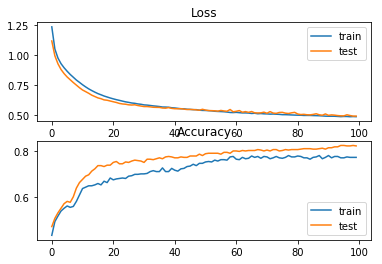

In [43]:
# transfer learning with mlp model on problem 2
from sklearn.datasets.samples_generator import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.models import load_model
from matplotlib import pyplot

# prepare a blobs examples with a given random seed
def samples_for_seed(seed):
	# generate samples
	X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=seed)
	# one hot encode output variable
	y = to_categorical(y)
	# split into train and test
	n_train = 500
	trainX, testX = X[:n_train, :], X[n_train:, :]
	trainy, testy = y[:n_train], y[n_train:]
	return trainX, trainy, testX, testy

# load and re-fit model on a training dataset
def fit_model(trainX, trainy, testX, testy):
	# load model
	###########################
    ##   insert code here   ###
    ###########################
	# compile model
	model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
	# re-fit model
	history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
	return model, history

# summarize the performance of the fit model
def summarize_model(model, history, trainX, trainy, testX, testy):
	# evaluate the model
	_, train_acc = model.evaluate(trainX, trainy, verbose=0)
	_, test_acc = model.evaluate(testX, testy, verbose=0)
	print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
	# plot loss during training
	pyplot.subplot(211)
	pyplot.title('Loss')
	pyplot.plot(history.history['loss'], label='train')
	pyplot.plot(history.history['val_loss'], label='test')
	pyplot.legend()
	# plot accuracy during training
	pyplot.subplot(212)
	pyplot.title('Accuracy')
	pyplot.plot(history.history['acc'], label='train')
	pyplot.plot(history.history['val_acc'], label='test')
	pyplot.legend()
	pyplot.show()

# prepare data
trainX, trainy, testX, testy = samples_for_seed(2)
# fit model on train dataset
model, history = fit_model(trainX, trainy, testX, testy)
# evaluate model behavior
summarize_model(model, history, trainX, trainy, testX, testy)

# Comparison of Models on Problem 2

In order to determine whether using transfer learning for the blobs multi-class classification problem has a real effect, we must repeat each experiment multiple times and analyze the average performance across the repeats.

We will compare the performance of the standalone model trained on Problem 2 to a model using transfer learning, averaged over 30 repeats.

The model trained on Problem 1 has two hidden layers. By keeping the first or the first and second hidden layers fixed, the layers with unchangeable weights will act as a feature extractor and may provide features that make learning Problem 2 easier, affecting the speed of learning and/or the accuracy of the model on the test set.

As the first step, we will simplify the fit_model() function to fit the model and discard any training history so that we can focus on the final accuracy of the trained model.

In [44]:
# define and fit model on a training dataset
def fit_model(trainX, trainy):
	# define model
	model = Sequential()
	model.add(Dense(5, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(3, activation='softmax'))
	# compile model
	model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
	# fit model
    ## history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
	model.fit(trainX, trainy, epochs=100, verbose=0)
    ## history is removed
    ## 
	return model

Next, we can develop a function that will repeatedly fit a new standalone model on Problem 2 on the training dataset and evaluate accuracy on the test set.

The eval_standalone_model() function below implements this, taking the train and test sets as arguments as well as the number of repeats and returns a list of accuracy scores for models on the test dataset.

In [45]:
# repeated evaluation of a standalone model
def eval_standalone_model(trainX, trainy, testX, testy, n_repeats):
	scores = list()
	for _ in range(n_repeats):
		# define and fit a new model on the train dataset
		model = fit_model(trainX, trainy)
		# evaluate model on test dataset
		_, test_acc = model.evaluate(testX, testy, verbose=0)
		scores.append(test_acc)
	return scores

Summarizing the distribution of accuracy scores returned from this function will give an idea of how well the chosen standalone model performs on Problem 2.

In [ ]:
# repeated evaluation of standalone model
standalone_scores = eval_standalone_model(trainX, trainy, testX, testy, n_repeats)
print('Standalone %.3f (%.3f)' % (mean(standalone_scores), std(standalone_scores)))

Tying all of the these elements together, the complete example is listed below.

In [ ]:
# compare standalone mlp model performance to transfer learning
from sklearn.datasets.samples_generator import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.models import load_model
from matplotlib import pyplot
from numpy import mean
from numpy import std

# prepare a blobs examples with a given random seed
def samples_for_seed(seed):
	# generate samples
	X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=seed)
	# one hot encode output variable
	y = to_categorical(y)
	# split into train and test
	n_train = 500
	trainX, testX = X[:n_train, :], X[n_train:, :]
	trainy, testy = y[:n_train], y[n_train:]
	return trainX, trainy, testX, testy

# define and fit model on a training dataset
def fit_model(trainX, trainy):
	# define model
	model = Sequential()
	model.add(Dense(5, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(3, activation='softmax'))
	# compile model
	model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
	# fit model
	model.fit(trainX, trainy, epochs=100, verbose=0)
	return model

# repeated evaluation of a standalone model
def eval_standalone_model(trainX, trainy, testX, testy, n_repeats):
	scores = list()
	for _ in range(n_repeats):
		# define and fit a new model on the train dataset
		model = fit_model(trainX, trainy)
		# evaluate model on test dataset
		_, test_acc = model.evaluate(testX, testy, verbose=0)
		scores.append(test_acc)
	return scores

# repeated evaluation of a model with transfer learning
def eval_transfer_model(trainX, trainy, testX, testy, n_fixed, n_repeats):
	scores = list()
	for _ in range(n_repeats):
		# load model
		model = load_model('model.h5')
		# mark layer weights as fixed or not trainable
		for i in range(n_fixed):
			model.layers[i].trainable = False
		# re-compile model
		model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
		# fit model on train dataset
		model.fit(trainX, trainy, epochs=100, verbose=0)
		# evaluate model on test dataset
		_, test_acc = model.evaluate(testX, testy, verbose=0)
		scores.append(test_acc)
	return scores

# prepare data for problem 2
trainX, trainy, testX, testy = samples_for_seed(2)
n_repeats = 30
dists, dist_labels = list(), list()

# repeated evaluation of standalone model
standalone_scores = eval_standalone_model(trainX, trainy, testX, testy, n_repeats)
print('Standalone %.3f (%.3f)' % (mean(standalone_scores), std(standalone_scores)))
dists.append(standalone_scores)
dist_labels.append('standalone')

# repeated evaluation of transfer learning model, vary fixed layers
n_fixed = 3
for i in range(n_fixed):
	scores = eval_transfer_model(trainX, trainy, testX, testy, i, n_repeats)
	print('Transfer (fixed=%d) %.3f (%.3f)' % (i, mean(scores), std(scores)))
	dists.append(scores)
	dist_labels.append('transfer f='+str(i))

# box and whisker plot of score distributions
pyplot.boxplot(dists, labels=dist_labels)
pyplot.show()

Standalone 0.797 (0.065)


In [ ]:
https://machinelearningmastery.com/how-to-improve-performance-with-transfer-learning-for-deep-learning-neural-networks/